In [1]:
%pip install  numpy
%pip install  pandas
%pip install  matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\aldem\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\aldem\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aldem\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("data/fish_data.csv", header=0)
dataset.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
# split independent and dependent variables
x = dataset.iloc[:891, [1,2]].values
y = dataset.iloc[:891, 0].values

In [5]:
y = np.where(y == 'Anabas testudineus', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [6]:
def explore_axis(x, y):
    class_norain = x[y == -1]
    class_rain = x[y == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_norain[:, 0], class_norain[:, 1], color='blue', label='no rain', alpha=0.7)
    plt.scatter(class_rain[:, 0], class_rain[:, 1], color='orange', label='rain', alpha=0.7)

    plt.xlabel("length")
    plt.ylabel("weight")
    plt.title("Classification Visualization: Anabas testudineus or Coilia dussumieri")
    plt.grid(True)
    plt.show()

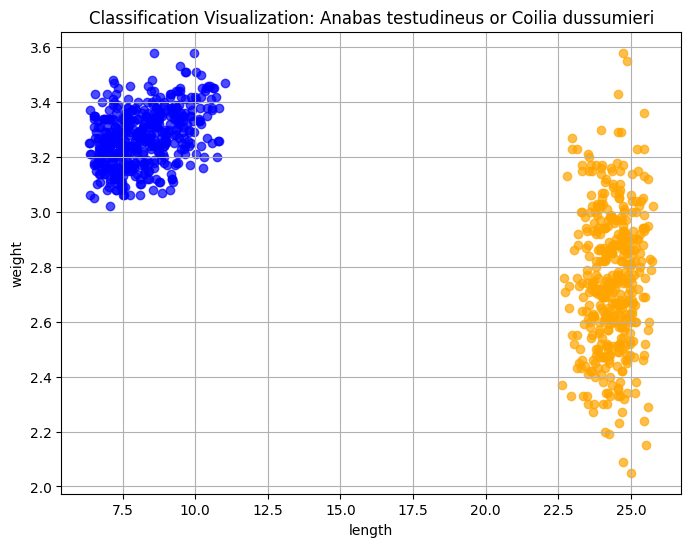

In [7]:
explore_axis(x, y)

In [17]:
import perceptron_test
from scripts.perceptron import PerceptronAlgorithm

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"Train size: {x_train.shape}, Test size: {x_test.shape}")
print(f"Train labels: {y_train[:10]}, Test labels: {y_test[:10]}")

Train size: (623, 2), Test size: (268, 2)
Train labels: [-1  1 -1 -1 -1 -1  1 -1  1 -1], Test labels: [ 1 -1  1  1 -1 -1 -1 -1 -1 -1]


In [20]:
model = PerceptronAlgorithm(eta=0.1, max_epochs=100, threshold=1e-4)
model.fit(x_train, y_train)

Epoch 1: Error = 0.048154093097913325
Epoch 2: Error = 0.0


In [21]:
model.test(x_test, y_test)
print(f"Accuracy = {model.accuracy}%")

Accuracy = 100.0%


In [23]:
from scripts.Eval import EvalClassifier

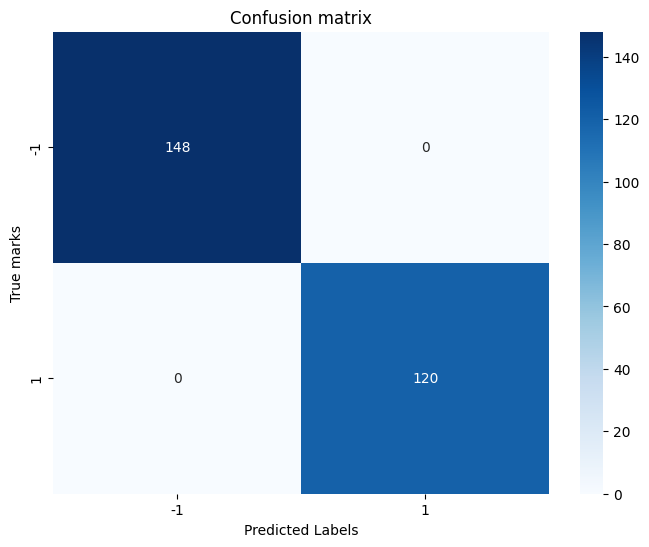

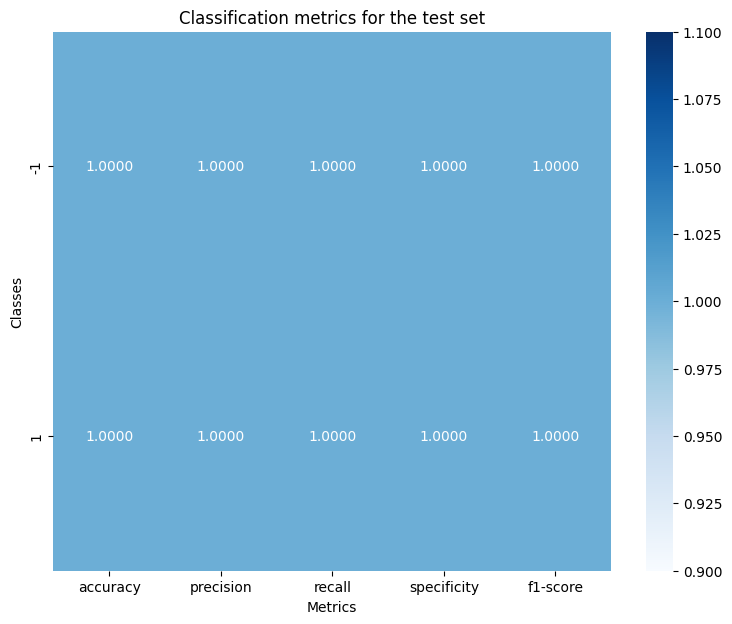

Test:
    accuracy  precision  recall  specificity  f1-score
-1       1.0        1.0     1.0          1.0       1.0
 1       1.0        1.0     1.0          1.0       1.0


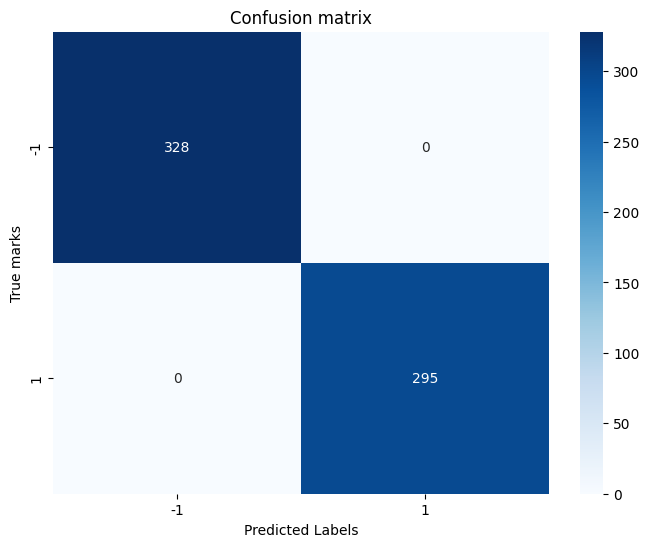

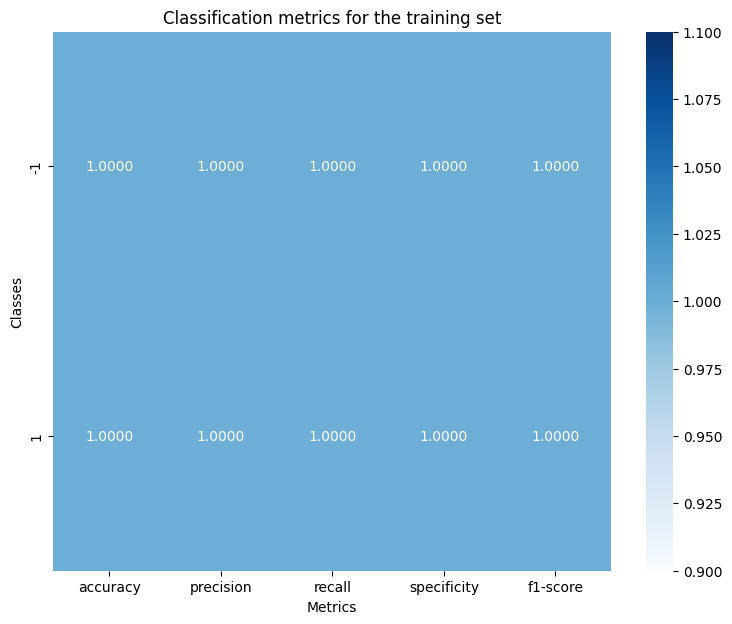

Train:
    accuracy  precision  recall  specificity  f1-score
-1       1.0        1.0     1.0          1.0       1.0
 1       1.0        1.0     1.0          1.0       1.0

Classification Report (Test):
                    precision    recall  f1-score   support

Anabas testudineus       1.00      1.00      1.00       148
 Coilia dussumieri       1.00      1.00      1.00       120

          accuracy                           1.00       268
         macro avg       1.00      1.00      1.00       268
      weighted avg       1.00      1.00      1.00       268


Classification Report (Train):
                    precision    recall  f1-score   support

Anabas testudineus       1.00      1.00      1.00       328
 Coilia dussumieri       1.00      1.00      1.00       295

          accuracy                           1.00       623
         macro avg       1.00      1.00      1.00       623
      weighted avg       1.00      1.00      1.00       623



In [24]:
from sklearn.metrics import classification_report

y_pred_test = model.test(x_test, y_test)
y_pred_train = model.test(x_train, y_train)

evaluator = EvalClassifier(model)

metrics_test = evaluator.evaluate_test(y_test, y_pred_test, classes=[-1, 1])
print("Test:")
print(metrics_test)

metrics_train = evaluator.evaluate_train(y_train, y_pred_train, classes=[-1, 1])
print("Train:")
print(metrics_train)

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, target_names=["Anabas testudineus", "Coilia dussumieri"]))

print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train, target_names=["Anabas testudineus", "Coilia dussumieri"]))


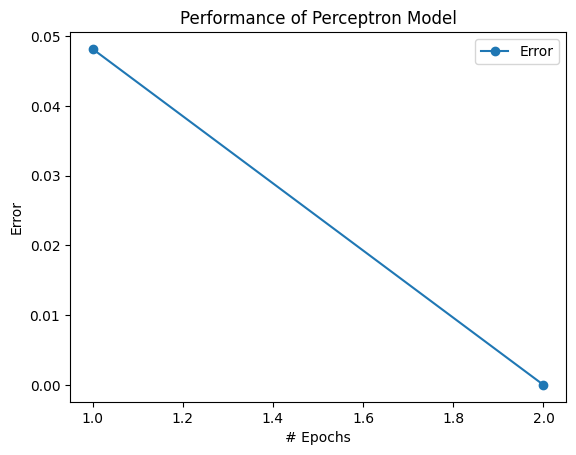

In [25]:
plt.plot(range(1, len(model.cost_)+1), model.cost_, marker='o', label="Error")
plt.title("Performance of Perceptron Model")
plt.xlabel("# Epochs")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    z = np.array([classifier.predict(point) for point in grid_points])
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha=0.8,
                    color=cmap(idx), marker=markers[idx], label=f"Class {classe}")


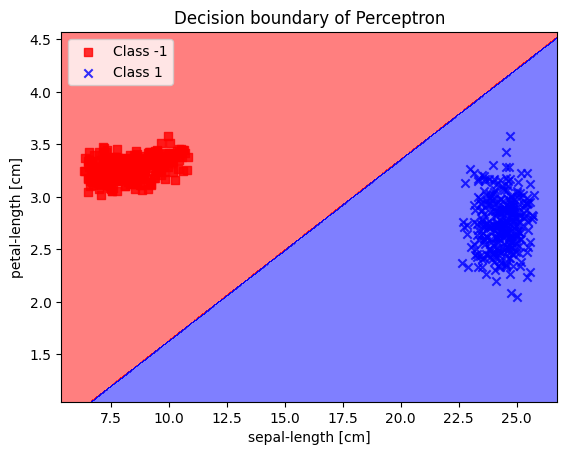

In [27]:
plot_decision_regions(x_train, y_train, model)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc='upper left')
plt.title('Decision boundary of Perceptron')
plt.show()

In [28]:
print("Perceptron classifier model:")
print(f"rain_or_not = {model.b[0]:.4f} + {model.w[0]:.4f} * sepal_length + {model.w[1]:.4f} * petal_length")

# Предсказание для новой точки
new_point = np.array([17.5, 1.5])  
pred = model.predict(new_point)
print("Class = ", pred)


Perceptron classifier model:
rain_or_not = -0.4619 + 0.8075 * sepal_length + -4.6777 * petal_length
Class =  1
